# ***TWITTER SENTIMENT ANALYSIS***

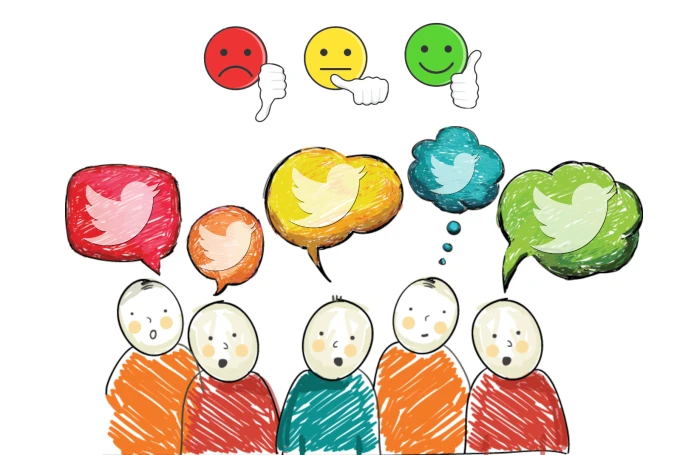

In [1]:
from IPython.display import Image
img = "twitter.png"
Image(img)

### Source -> kaggle.com

# ***1.Data Import and Exploration***

## **1.1) Import Libraries and Load Dataset**

In [2]:
# import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [3]:
# load dataset 
# Facing UnicodeDecodeError 'utf-8'
# In order to handle this, error detecting encodings

import pandas as pd
file_path = "twitter_sentiment.csv"

# Try common encodings

encodings = ['utf-8', 'ISO-8859-1', 'latin1', 'cp1252']
for encoding in encodings:
    try:
        tweet = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully loaded with encoding: {encoding}")
        print(tweet.head()) # Print the first few rows of the dataframe
        break
    except Exception as e:
        print(f"Error with encoding {encoding}: {e}")

Error with encoding utf-8: 'utf-8' codec can't decode bytes in position 80-81: invalid continuation byte
Successfully loaded with encoding: ISO-8859-1
   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy a

In [4]:
# Reading file with errors handling

file_path = 'twitter_sentiment.csv'

try:
    with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
        data = file.read()
    print(data[:500]) # Print the first 500 characters of the content
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")

"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"
"0","1467810672","Mon Apr 06 22:19:49 PDT 2009","NO_QUERY","scotthamilton","is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"
"0","1467810917","Mon Apr 06 22:19:53 PDT 2009","NO_QUERY","mattycus","@Kenichan I dived many times for the ball. Ma


In [5]:
tweet.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
tweet.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [7]:
# Import the column names

tweet.columns = ["target","Ids","date","flag","user","text"]
tweet.head()

,target,Ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## **1.2) Examine structure**

In [8]:
# Display the first few rows of the dataset

tweet.head(10)

,target,Ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [9]:
# Display the last few rows of the dataset

tweet.tail(10)

,target,Ids,date,flag,user,text
1599989,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599990,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599991,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599992,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS
1599993,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha..."
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


## **1.3) Column names and dtypes**

In [10]:
# Display the column names

tweet.columns

Index(['target', 'Ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [11]:
# Display the Datatypes of each colummn

print("Data Types:")
print(tweet.dtypes)

Data Types:
target     int64
Ids        int64
date      object
flag      object
user      object
text      object
dtype: object


## **1.4) Examine size**

In [12]:
# Display the number of rows and columns

print("Shape of the Dataset")
tweet.shape

Shape of the Dataset


(1599999, 6)

In [13]:
# Total number of rows

print("Number of rows:",
tweet.shape[0])

Number of rows: 1599999


In [14]:
# Total number of columns

print("Number of columns:",
tweet.shape[1])

Number of columns: 6


## **1.5) Examine features**

In [15]:
# Dataset information

tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   Ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [16]:
# Descriptive Statistics for numeric values

tweet.describe()

,target,Ids
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


## **1.6) Identify Key variables**

### **1.6.1) Tweet Content(text)**

In [17]:
# View sample text

tweet['text'].head()

0    is upset that he can't update his Facebook by ...
1    @Kenichan I dived many times for the ball. Man...
2      my whole body feels itchy and like its on fire 
3    @nationwideclass no, it's not behaving at all....
4                        @Kwesidei not the whole crew 
Name: text, dtype: object

### **1.6.2) Timestamp(date)**

In [18]:
# View sample date

tweet['date'].head()

0    Mon Apr 06 22:19:49 PDT 2009
1    Mon Apr 06 22:19:53 PDT 2009
2    Mon Apr 06 22:19:57 PDT 2009
3    Mon Apr 06 22:19:57 PDT 2009
4    Mon Apr 06 22:20:00 PDT 2009
Name: date, dtype: object

### **1.6.3) Sentiment Labels(target)**

In [19]:
# View Sentiment label distribution

tweet['target'].value_counts()

target
4    800000
0    799999
Name: count, dtype: int64

In [20]:
# View Sample tweets with sentiment labels

tweet[['text','target']].sample(5)

,text,target
325868,missing my babies,0
1447051,@electrookosh happy bday!! all the bestest wis...,4
1508726,@clitracist thanx,4
297972,Currently doing research for a school project ...,0
176290,After hearing susan boyle sing she came off as...,0


# ***2.Data Cleaning***

## **2.1) Handle Missing values**

In [21]:
# Finding missing values

tweet.isnull().sum()

target    0
Ids       0
date      0
flag      0
user      0
text      0
dtype: int64

## **2.2) Handle Duplicate values**

In [22]:
# Finding duplicate values

duplicates = tweet.duplicated().sum()
print(f"Number of duplicate rows:{duplicates}")

Number of duplicate rows:0


## **2.3) Drop Irrelevant Columns**

In [23]:
tweet.columns

Index(['target', 'Ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [24]:
# Drop unnecessary columns

tweet = tweet.drop(columns=['Ids','flag', 'user'])

## **2.4) Address Anomalies and Inconsistencies**

### **2.4.1) Anomalies in text data**

In [25]:
# Check for extremely long or short tweets

tweet['text_length'] = tweet['text'].apply(len)
long_tweets = tweet[tweet['text_length']>280] # Twitter character limit is 280
short_tweets = tweet[tweet['text_length']<5]

In [26]:
tweet.columns

Index(['target', 'date', 'text', 'text_length'], dtype='object')

In [27]:
# Detect and handle unusual characters

import re
def clean_text(text):
    text = re.sub(r'[^\x00-\x7F]+','',text) # Remove non-ASCII characters
    text = re.sub(r'\s+','',text).strip() # Remove extra white spaces
    return text
tweet['cleaned_text'] = tweet['text'].apply(clean_text)  

In [28]:
tweet.columns

Index(['target', 'date', 'text', 'text_length', 'cleaned_text'], dtype='object')

### **2.4.2) Anomalies in date data**

In [29]:
# Verify date format

from datetime import datetime

tweet['date'] = pd.to_datetime(tweet['date'])

# Display the range of timestamps

print(f'Earliest tweet:{tweet["date"].min()}')
print(f'Latest tweet:{tweet["date"].max()}')

C:\Users\AAKASH\AppData\Local\Temp\ipykernel_2196\2671993356.py:5: FutureWarning: Parsed string "Mon Apr 06 22:19:49 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  tweet['date'] = pd.to_datetime(tweet['date'])


Earliest tweet:2009-04-06 22:19:49
Latest tweet:2009-06-25 10:28:31


In [30]:
# view sample

tweet['date'].head()

0   2009-04-06 22:19:49
1   2009-04-06 22:19:53
2   2009-04-06 22:19:57
3   2009-04-06 22:19:57
4   2009-04-06 22:20:00
Name: date, dtype: datetime64[ns]

In [31]:
# Check for missing dates

missing_dates = tweet[tweet['date'].isna()]
tweet = tweet.dropna(subset=['date'])

### **2.4.3) Anomalies in sentiment data**

In [32]:
# Check for unexpected sentiment

invalid_labels = tweet[~tweet['target'].isin([0,2,4])]
tweet = tweet[tweet['target'].isin([0,2,4])]

In [33]:
# View sample

tweet['target'].sample(10)

455482     0
336415     0
1232579    4
48281      0
1422568    4
1550163    4
962434     4
426077     0
362440     0
915144     4
Name: target, dtype: int64

# ***3.Exploratory Data Analysis (EDA)***

## **3.1) Summary Statistics**

In [34]:
# Descriptive Statistics for numeric values

tweet.describe()

,target,date,text_length
count,1.599999e+06,1599999,1.599999e+06
mean,2.000001e+00,2009-05-31 07:26:27.994492416,7.409009e+01
min,0.000000e+00,2009-04-06 22:19:49,6.000000e+00
25%,0.000000e+00,2009-05-28 23:01:17.500000,4.400000e+01
50%,4.000000e+00,2009-06-02 03:08:55,6.900000e+01
75%,4.000000e+00,2009-06-15 05:21:43.500000,1.040000e+02
max,4.000000e+00,2009-06-25 10:28:31,3.740000e+02
std,2.000001e+00,NaN,3.644114e+01


In [35]:
# Descriptive Statistics for object values

tweet.describe(include="object")

,text,cleaned_text
count,1599999,1599999
unique,1581465,1580166
top,isPlayer Has Died! Sorry,isPlayerHasDied!Sorry
freq,210,210


## **3.2) Data Distribution Visualizations**

<Axes: >

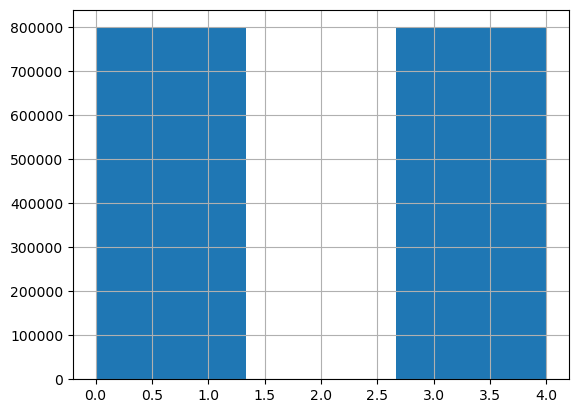

In [36]:
# Histogram

tweet['target'].hist(bins=3)

## **3.3) Initial insights**

### **3.3.1) Tweet Patterns**

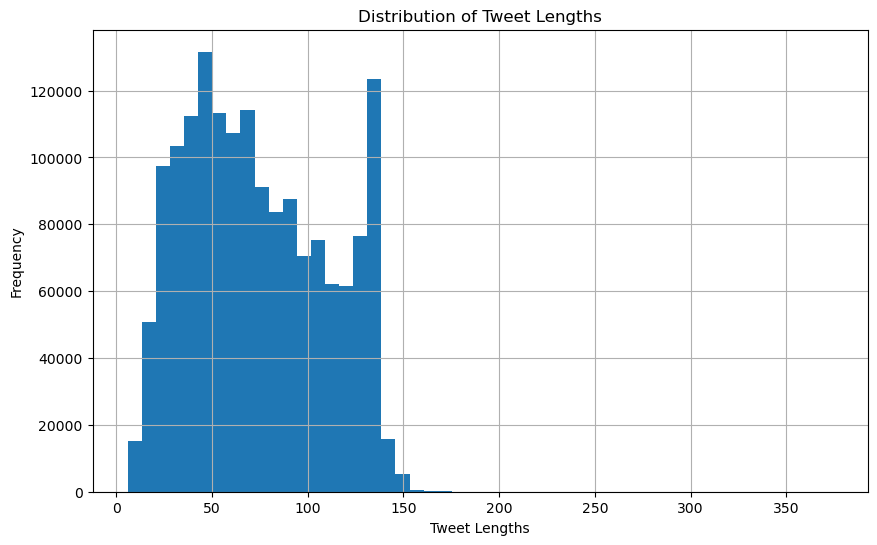

In [37]:
# Tweet Length Distribution

tweet['text_length'].hist(bins=50, figsize=(10,6))
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Lengths')
plt.ylabel('Frequency')
plt.show()

### **3.3.2) Sentiment Distributions**

In [38]:
# View Sentiment label distribution

tweet['target'].value_counts()

target
4    800000
0    799999
Name: count, dtype: int64

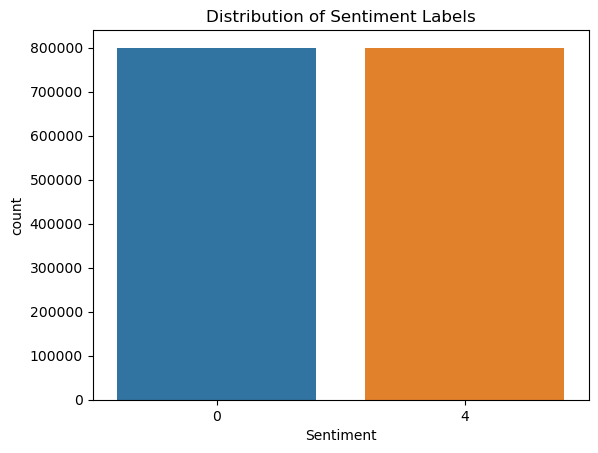

In [39]:
# Distribution of Sentiment Labels

sns.countplot(x='target', data=tweet)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.show()

### **3.3.3) Temporal Trends analyse data by year & month**

In [40]:
# Extract the year and month from the 'Date' Column

tweet['year'] = tweet['date'].dt.year
tweet['month'] = tweet['date'].dt.month

# Display the unique years present in the dataset

unique_years = tweet['year'].unique()
print("Unique Years in Dataset:",unique_years)

# Display the number of records for each year

yearly_counts = tweet['year'].value_counts().sort_index()
print("\nRecords per Year:\n")
print(yearly_counts)

Unique Years in Dataset: [2009]

Records per Year:

year
2009    1599999
Name: count, dtype: int64


In [41]:
# Display the unique months present in the dataset

month_by_year = tweet.groupby('year')['month'].unique().reset_index()
print("Months avaliable for each year:\n")
print(month_by_year)

# Display the number of records for each year and month

year_month_counts = tweet.groupby(['year','month']).size().reset_index(name='counts')
print("\nNumber of Records by year and month:\n")
print(year_month_counts)

Months avaliable for each year:

   year      month
0  2009  [4, 5, 6]

Number of Records by year and month:

   year  month  counts
0  2009      4  100024
1  2009      5  576367
2  2009      6  923608


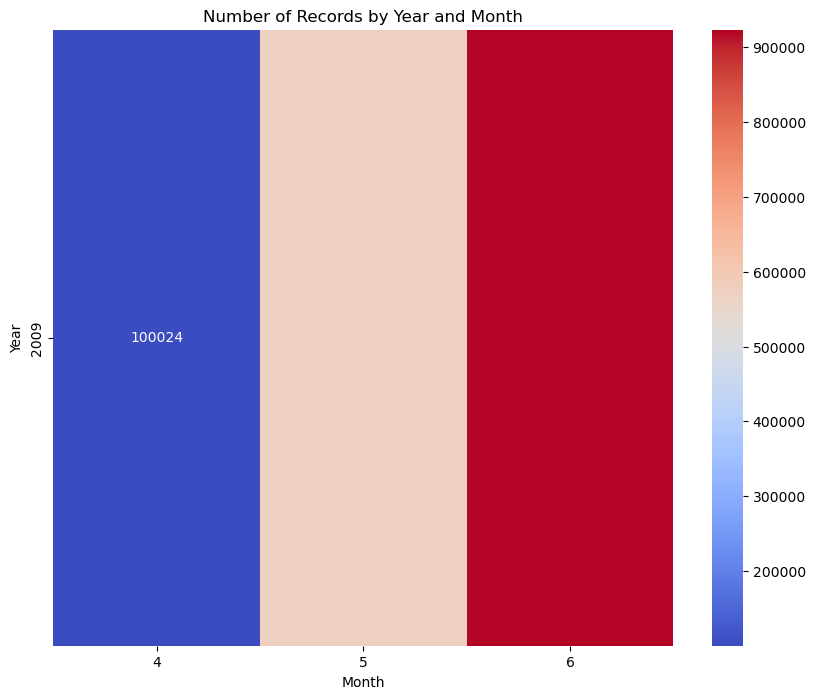

In [42]:
# Visualize the number of of records by year and month

# pivot the data

year_month_pivot = year_month_counts.pivot(index= 'year',columns= 'month',values ='counts')

# Plot the Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(year_month_pivot,annot=True, fmt='d',cmap='coolwarm', cbar=True)

plt.title('Number of Records by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# ***4.Sentiment Distributions***

## **4.1) Visualize the distribution of sentiment labels**

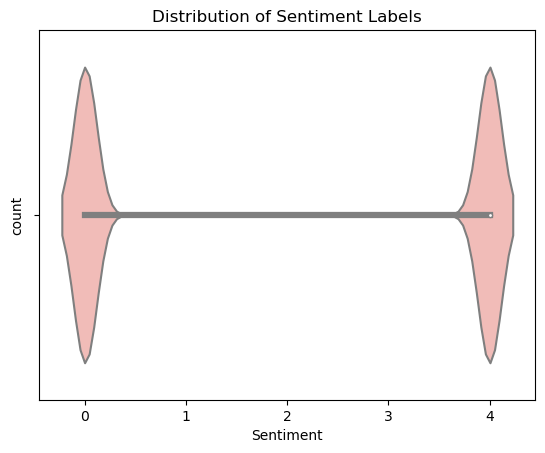

In [43]:
# Distribution of Sentiment Labels

sns.violinplot(x='target', data=tweet,palette='Pastel1')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.show()

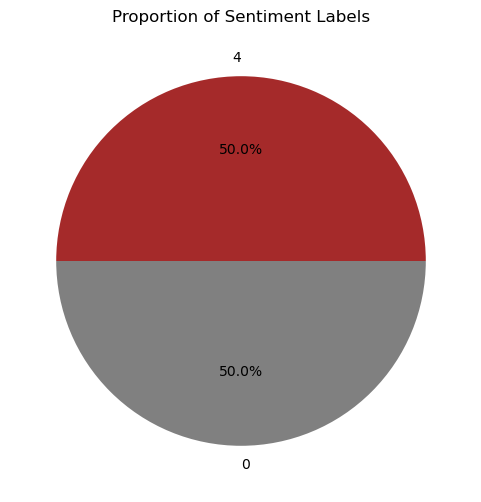

In [44]:
# Pie chart of sentiment proportions

sentiment_proportions = tweet['target'].value_counts(normalize=True)*100

sentiment_proportions.plot.pie(autopct='%1.1f%%', colors=['brown','grey'], figsize=(6,6))
plt.title('Proportion of Sentiment Labels')
plt.ylabel('')
plt.show()

## **4.2) Analyse the balance of sentiment classes**

In [45]:
# Class balance analysis

sentiment_counts = tweet['target'].value_counts()
print(sentiment_counts)

target
4    800000
0    799999
Name: count, dtype: int64


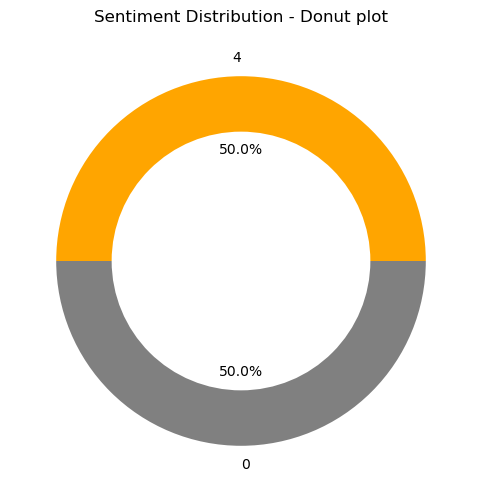

In [46]:
# visualize class balance with donut chart

plt.figure(figsize=(6,6))
plt.pie(sentiment_proportions,labels=sentiment_proportions.index, autopct='%1.1f%%', colors=['orange','grey'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Sentiment Distribution - Donut plot')
plt.show()

In [47]:
# Evaluate Potential Biases

total_counts = sentiment_counts.sum()

imbalance_ratio = sentiment_counts/total_counts
print("Class Imbalance Ratios")
print(imbalance_ratio)

Class Imbalance Ratios
target
4    0.5
0    0.5
Name: count, dtype: float64


In [48]:
tweet.columns

Index(['target', 'date', 'text', 'text_length', 'cleaned_text', 'year',
       'month'],
      dtype='object')

In [49]:
tweet.head()

,target,date,text,text_length,cleaned_text,year,month
0,0,2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,111,isupsetthathecan'tupdatehisFacebookbytextingit...,2009,4
1,0,2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...,89,@KenichanIdivedmanytimesfortheball.Managedtosa...,2009,4
2,0,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,47,mywholebodyfeelsitchyandlikeitsonfire,2009,4
3,0,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",111,"@nationwideclassno,it'snotbehavingatall.i'mmad...",2009,4
4,0,2009-04-06 22:20:00,@Kwesidei not the whole crew,29,@Kwesideinotthewholecrew,2009,4


# ***5.Temporal Analysis***

## **5.1) Explore Sentiment varies over time**

In [50]:
# Display the unique years present in the dataset

unique_years = tweet['year'].unique()
print("Unique Years in Dataset:",unique_years)

# Display the number of records for each year

yearly_counts = tweet['year'].value_counts().sort_index()
print("\nRecords per Year:\n")
print(yearly_counts)

Unique Years in Dataset: [2009]

Records per Year:

year
2009    1599999
Name: count, dtype: int64


In [51]:
# Display the unique months present in the dataset

month_by_year = tweet.groupby('year')['month'].unique().reset_index()
print("Months avaliable for each year:\n")
print(month_by_year)

# Display the number of records for each year and month

year_month_counts = tweet.groupby(['year','month']).size().reset_index(name='counts')
print("\nNumber of Records by year and month:\n")
print(year_month_counts)

Months avaliable for each year:

   year      month
0  2009  [4, 5, 6]

Number of Records by year and month:

   year  month  counts
0  2009      4  100024
1  2009      5  576367
2  2009      6  923608


## **5.2) Sentiment Distribution by Month**

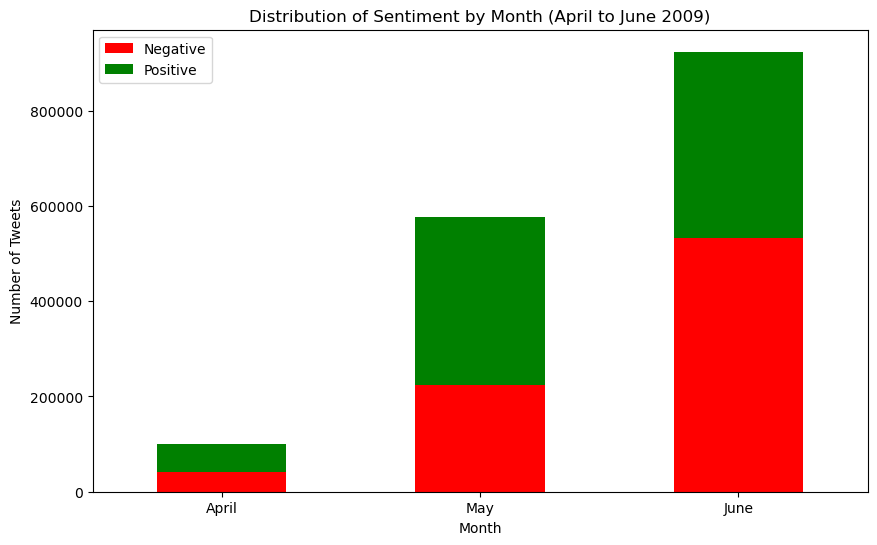

In [52]:
# Group by month and sentiment labels to count the number of tweets

monthly_sentiment_distribution = tweet.groupby(['month', 'target']).size().unstack()

# Plot a stacked bar chart showing sentiment distribution over month
monthly_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10,6), color=['red','green'])
plt.title('Distribution of Sentiment by Month (April to June 2009)')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0,1,2], labels=['April', 'May', 'June'],rotation=0)
plt.legend(['Negative','Positive'])
plt.show()

## **5.3) Sentiment Distribution by Week**

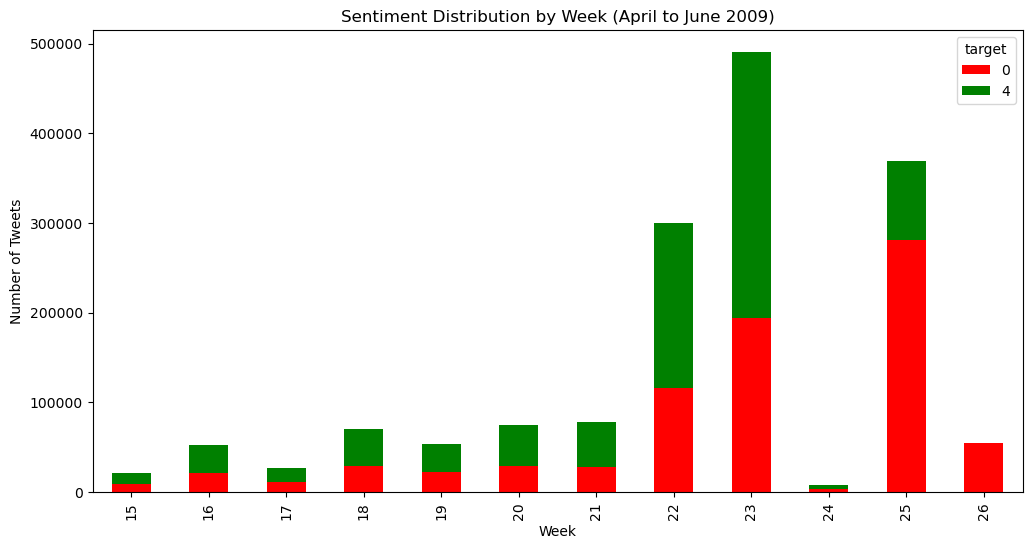

In [53]:
# Create a 'week' column based on the date
tweet['week'] = tweet['date'].dt.isocalendar().week

# Group by week and sentiment label to count the number of tweets
weekly_sentiment_distribution = tweet.groupby(['week', 'target']).size().unstack()

# Plot a stacked bar chart showing the sentiment distribution by week
weekly_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.title('Sentiment Distribution by Week (April to June 2009)')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.show()

## **5.4) Sentiment Distribution by Day of the Week**

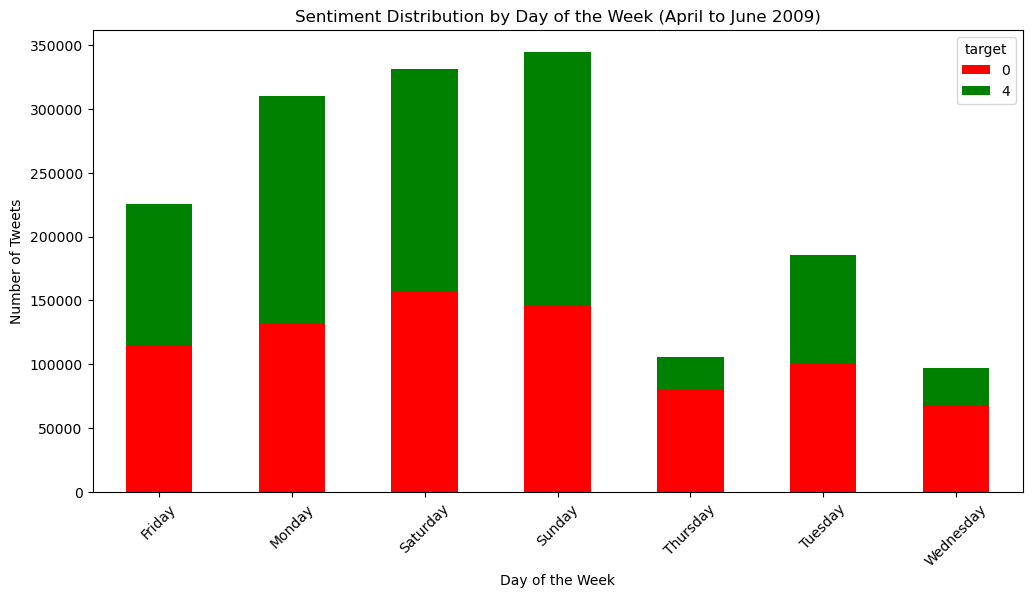

In [54]:
# Create a 'day_of_week' column
tweet['day_of_week'] = tweet['date'].dt.day_name()

# Group by day of the week and sentiment label to count the number of tweets
daily_sentiment_distribution = tweet.groupby(['day_of_week', 'target']).size().unstack()

# Plot a stacked bar chart showing the sentiment distribution by day of the week
daily_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.title('Sentiment Distribution by Day of the Week (April to June 2009)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

# ***6.Text Preprocessing***

## **6.1) Removing Stop words,Special characters,URLs**

In [55]:
import re
from nltk.corpus import stopwords

# Download stop words list 

import nltk
nltk.download('stopwords')

# Define the stop words

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs
    
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters, numbers, and punctuations
    
    text = re.sub(r'\@\w+|\#|\d+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization and removing stop words
    
    tokens = text.split()
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Join tokens back into a single string
    
    text = ' '.join(tokens)
    return text

# Apply the preprocessing function to the cleaned_text column

tweet['processed_text'] = tweet['cleaned_text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AAKASH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **6.2) Tokenization and Lemmatization**

In [59]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources

nltk.download('punkt')
nltk.download('wordnet')

# Initialize the lemmatizer

lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    
    # Tokenize the text
    
    tokens = word_tokenize(text)
    
    # Lemmatize each token
    
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]
    
    # Join tokens back into a single string
    
    text = ' '.join(tokens)
    return text

# Apply tokenization and lemmatization to the processed_text column

tweet['processed_text'] = tweet['processed_text'].apply(tokenize_and_lemmatize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AAKASH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AAKASH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# ***7. Word Frequency Analysis***

## **7.1) Analyzing word Frequency by sentiment**

In [57]:
from collections import Counter

# Separate tweets by sentiment

positive_tweets = tweet[tweet['target'] == 4]['processed_text']
negative_tweets = tweet[tweet['target'] == 0]['processed_text']
neutral_tweets = tweet[tweet['target'] == 2]['processed_text']

# Function to get word frequency

def get_word_frequency(tweets):
    words = ' '.join(tweets).split()
    word_freq = Counter(words)
    return word_freq

# Get word frequencies

positive_freq = get_word_frequency(positive_tweets)
negative_freq = get_word_frequency(negative_tweets)
neutral_freq = get_word_frequency(neutral_tweets)

## **7.2) Visualizing Word Frequency with Bar Charts**

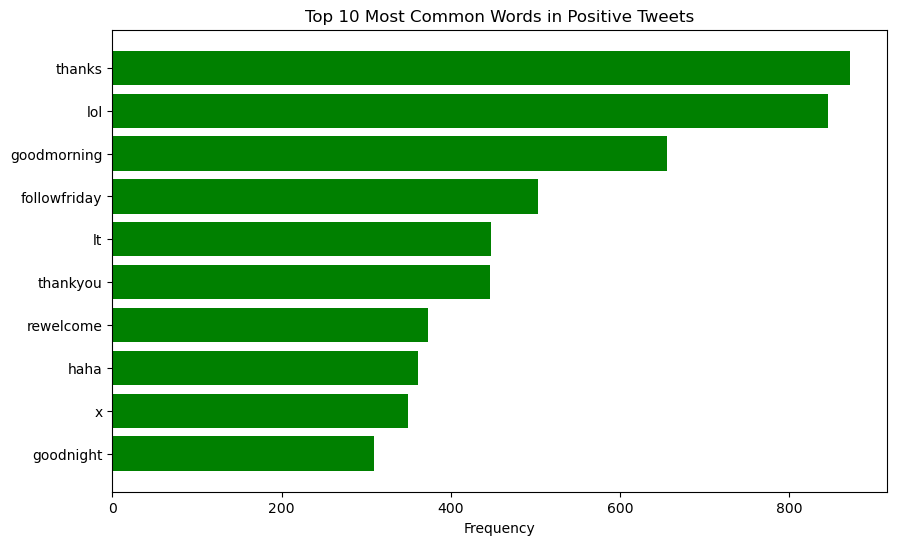

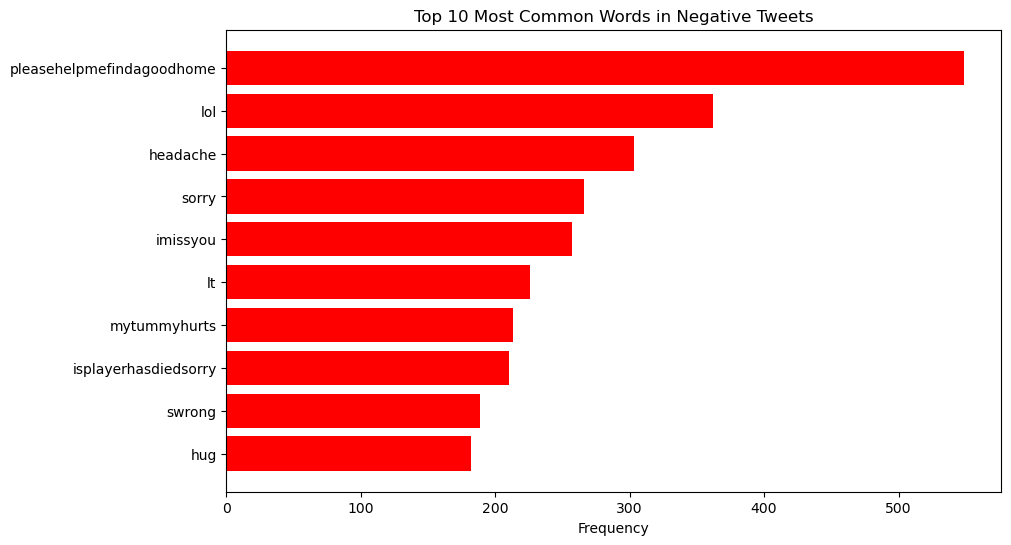

ValueError: not enough values to unpack (expected 2, got 0)

In [58]:
import matplotlib.pyplot as plt

# Function to plot the top N words

def plot_top_words(word_freq, sentiment_label, color='blue', top_n=10):
    most_common_words = word_freq.most_common(top_n)
    words, counts = zip(*most_common_words)
    
    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color=color)
    plt.title(f'Top {top_n} Most Common Words in {sentiment_label} Tweets')
    plt.xlabel('Frequency')
    plt.gca().invert_yaxis()  # To display the highest frequency word at the top
    plt.show()

# Plot the top 10 words for positive, negative, and neutral tweets

plot_top_words(positive_freq, 'Positive', color='green')
plot_top_words(negative_freq, 'Negative', color='red')
plot_top_words(neutral_freq, 'Neutral', color='gray')

## **7.3) Visualizing Word Frequency with Word Clouds**

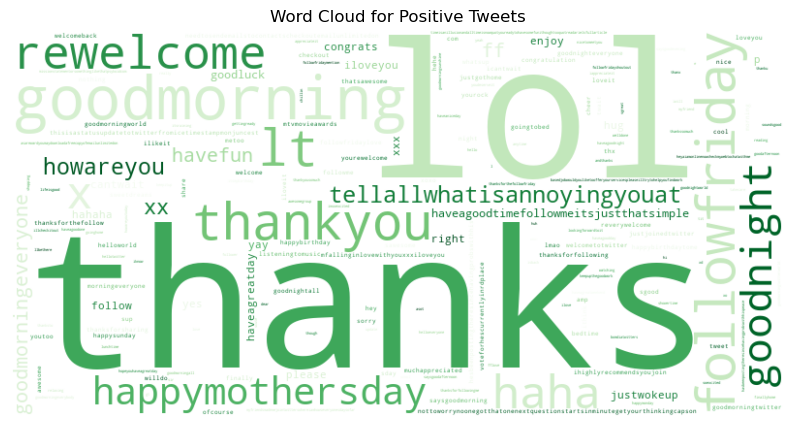

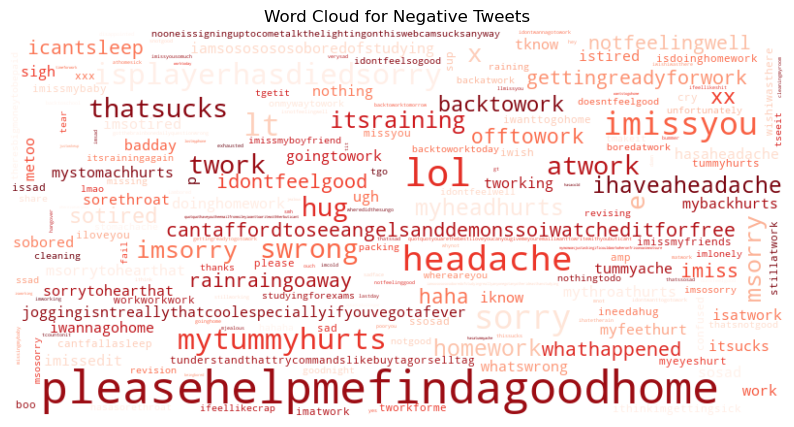

No words to display for Neutral sentiment.


In [60]:
from wordcloud import WordCloud

# Function to create a word cloud
def create_word_cloud(word_freq, sentiment_label, color_map='viridis'):
    if len(word_freq) == 0:
        print(f"No words to display for {sentiment_label} sentiment.")
        return
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color="white", 
        colormap=color_map
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'Word Cloud for {sentiment_label} Tweets')
    plt.axis('off')
    plt.show()

# Assuming positive_freq, negative_freq, and neutral_freq are dictionaries of word frequencies
# Create word clouds for positive, negative, and neutral tweets

create_word_cloud(positive_freq, 'Positive', color_map='Greens')
create_word_cloud(negative_freq, 'Negative', color_map='Reds')
create_word_cloud(neutral_freq, 'Neutral', color_map='Blues')

In [61]:
tweet.columns

Index(['target', 'date', 'text', 'text_length', 'cleaned_text', 'year',
       'month', 'week', 'day_of_week', 'processed_text'],
      dtype='object')

In [62]:
# View sample

tweet.sample(5)

,target,date,text,text_length,cleaned_text,year,month,week,day_of_week,processed_text
238005,0,2009-05-31 06:24:07,Adam Lambert almost did &quot;Starlight&quot; ...,121,AdamLambertalmostdid&quot;Starlight&quot;and&q...,2009,5,22,Sunday,adamlambertalmostdidquotstarlightquotandquotsu...
1032295,4,2009-05-26 23:11:45,"I was sleeping but thunder, lightning and hubb...",138,"Iwassleepingbutthunder,lightningandhubby'ssurr...",2009,5,22,Tuesday,iwassleepingbutthunderlightningandhubbyssurrou...
867003,4,2009-05-02 03:31:48,@RIOTtwilight if it's new it should be alright,47,@RIOTtwilightifit'snewitshouldbealright,2009,5,18,Saturday,snewitshouldbealright
839261,4,2009-04-19 10:55:37,Was at rainforest cafe. Found a keychain tha s...,124,Wasatrainforestcafe.Foundakeychainthasaidshane...,2009,4,16,Sunday,wasatrainforestcafefoundakeychainthasaidshaneo...
295071,0,2009-06-01 15:39:21,@fountain1987 you make me sad ! why did you ...,136,@fountain1987youmakemesad!whydidyouhavetoleave...,2009,6,23,Monday,whydidyouhavetoleavehollyoaksyouwereamazingitm...


# ***8. Sentiment Prediction Model***

## **8.1) Import Libraries**

In [63]:
# Import necessary libraries for making the model

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

## **8.2) Prepare the data**

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Extraction with TF-IDF (Sparse Matrix)

tfidf = TfidfVectorizer(max_features=1000)  # Adjust based on your needs
X = tfidf.fit_transform(tweet['processed_text'])

# Target variable
y = tweet['target']

## **8.3) Subset the dataset**

In [65]:
# Sample a subset of the data

subset_fraction = 0.2
tweet_subset = tweet.sample(frac = subset_fraction, random_state = 42)

# Extract features and target from the subset
X_subset = tfidf.transform(tweet_subset['processed_text']).toarray()
y_subset = tweet_subset['target']

## **8.4) Split the Subset into Training & Testing sets**

In [66]:
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset,y_subset,test_size=0.2,random_state=42)

## **8.5) Train the Model**

In [67]:
# Instantiate and train the Logistic Regression model

model = LogisticRegression(max_iter=1000)
model.fit(X_train_subset,y_train_subset)

LogisticRegression(max_iter=1000)

## **8.6) Make Predictions**

In [68]:
y_pred_subset = model.predict(X_test_subset)

## **8.7) Evaluate the Model**

### **8.7.1) Evaluate Accuracy**

In [69]:
accuracy_subset = accuracy_score(y_test_subset,y_pred_subset)
print(f'Accuracy on Subset:{accuracy_subset:.4f}')

Accuracy on Subset:0.5085


### **8.7.2) Evaluate F1 Score**

In [70]:
f1_subset = f1_score(y_test_subset,y_pred_subset, average='weighted')
print(f'Weighted F1 Score on Subset:{f1_subset:.4f}')

Weighted F1 Score on Subset:0.3516


### **8.7.3) Classification Report and Confusion Matrix**

In [71]:
# Classification Report
print(classification_report(y_test_subset, y_pred_subset))

              precision    recall  f1-score   support

           0       0.91      0.02      0.03     31912
           4       0.50      1.00      0.67     32088

    accuracy                           0.51     64000
   macro avg       0.71      0.51      0.35     64000
weighted avg       0.71      0.51      0.35     64000



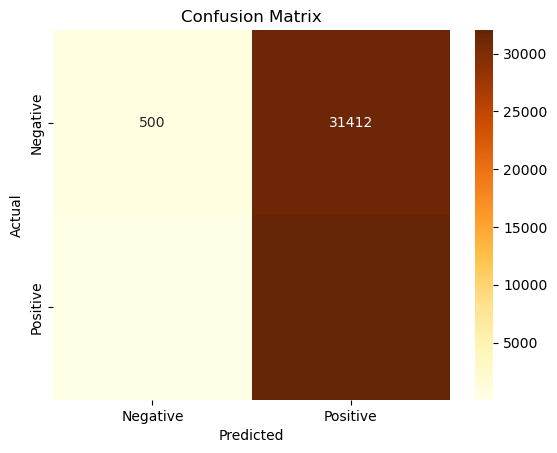

In [72]:
# Confusion Matrix
cm = confusion_matrix(y_test_subset, y_pred_subset)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ***9. Feature Importance***

## **9.1) Extract Feature Importance**

In [73]:
# Extract feature names and coefficients

feature_names = tfidf.get_feature_names_out()
coefficients = model.coef_.flatten()

# Create a DataFrame to hold feature names and their importance

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort features by their absolute coefficient values

feature_importance['Absolute_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

## **9.2) Visualize Feature Importance**

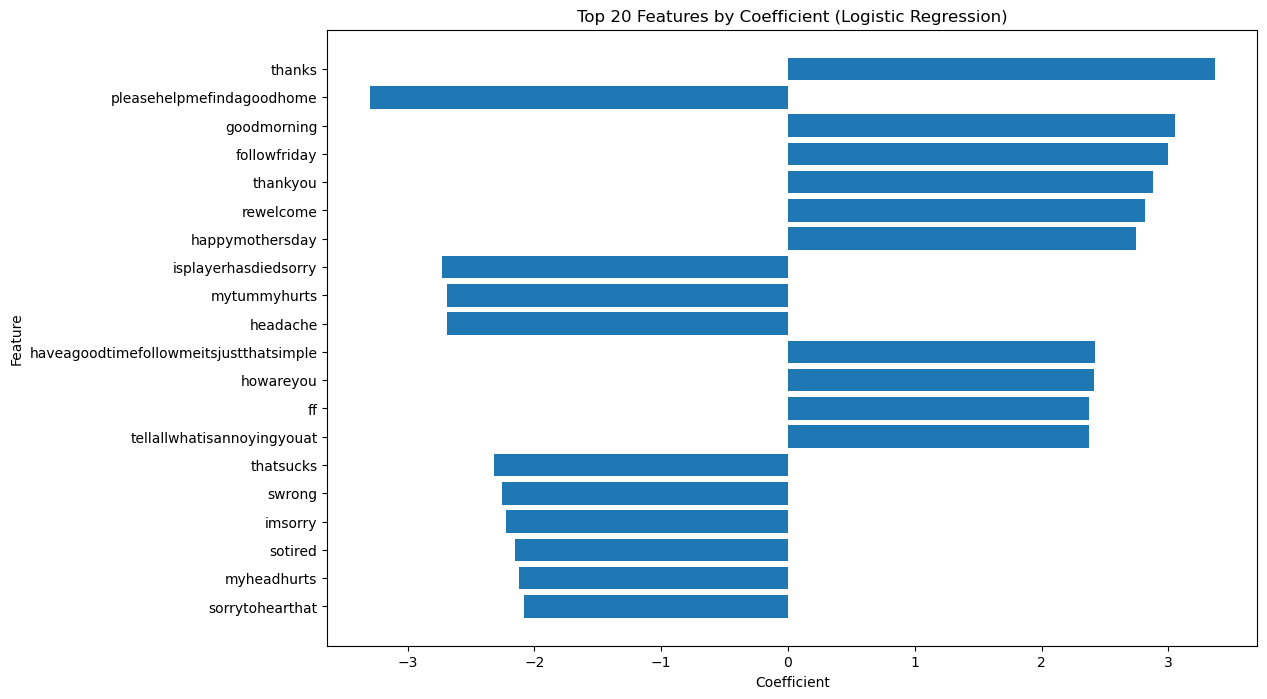

In [74]:
# Bar Chart

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'].head(20), feature_importance['Coefficient'].head(20))
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Features by Coefficient (Logistic Regression)')
plt.gca().invert_yaxis()
plt.show()

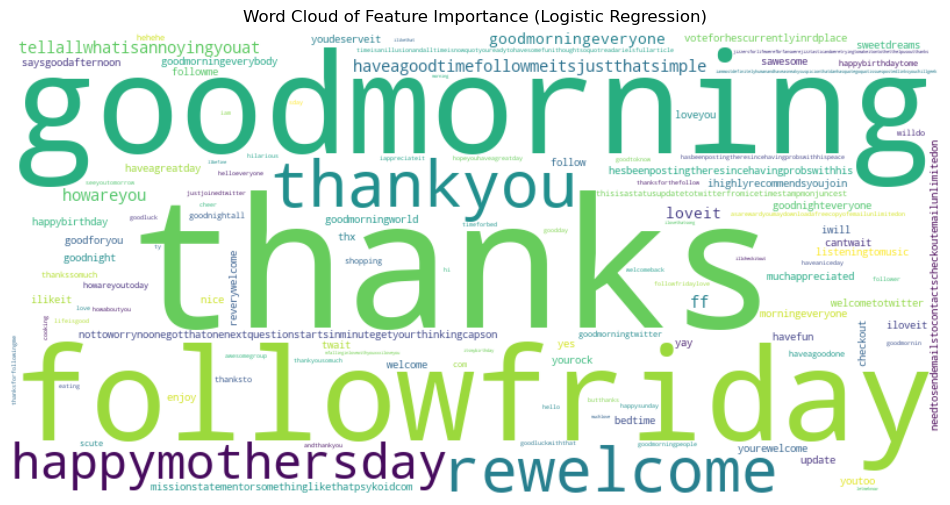

In [75]:
# Word Cloud

from wordcloud import WordCloud

# Create a dictionary of feature names and their importance
importance_dict = dict(zip(feature_names, coefficients))

# Create and display the word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(importance_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feature Importance (Logistic Regression)')
plt.show()

# ***10.Key Insights***

 ## **1) Equal Proportions**
   - The dataset contains an equal proportion of positive and negative sentiments, with no neutral sentiments. This suggests a polarized set of opinions among Twitter users.

**Core findings :** 
 - **Equal Proportions**: The dataset has `equal proportions of positive and negative sentiments`.


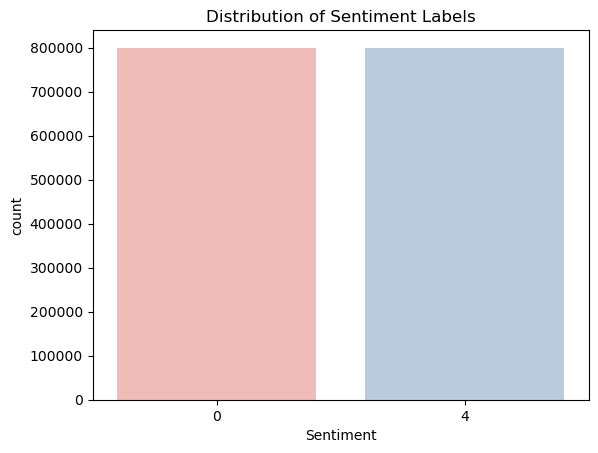

In [76]:
sns.countplot(x='target', data=tweet,palette = "Pastel1")
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.show()

## **2) Temporal Sentiment Shift**:
   - While sentiment remained balanced in April, there was a gradual increase in positive sentiment during May. However, this trend reversed sharply in June, with Weeks 25 and 26 showing a significant rise in negative sentiment.

**Core findings :**
- **Sentiment Shift**:
   - **April** : `Balance`
   - **May**: Increase in `positive` sentiment.
   - **June**: Sharp rise in `negative` sentiment.

## **3) Sentiment Across Months**:
    - April and May exhibited a relatively balanced sentiment distribution, while June showed a pronounced shift towards negativity, particularly in its last weeks. This trend highlights potential seasonal or event-driven sentiment changes.

**Core findings :**
- **Monthly Sentiment**
    - **April & May**: `Balanced.`
    - **June**: Pronounced shift towards `negative sentiment.`


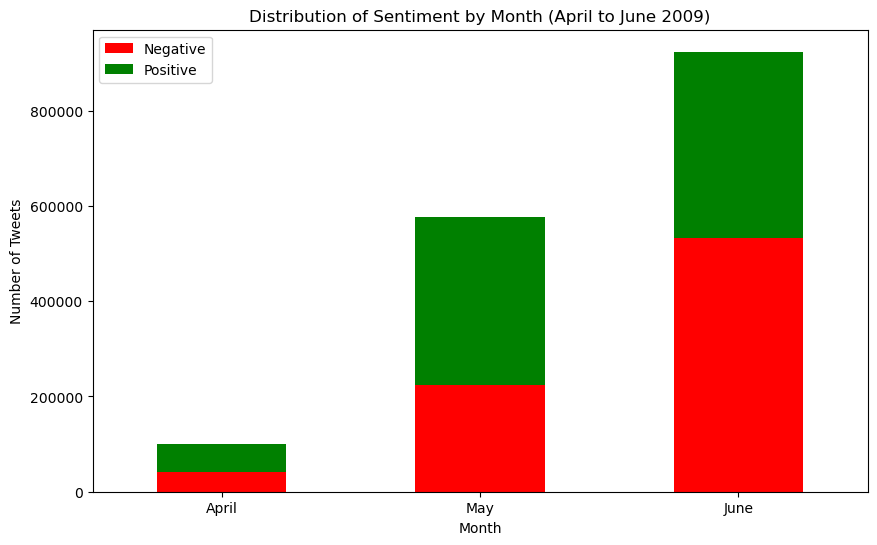

In [77]:
# Group by month and sentiment labels to count the number of tweets

monthly_sentiment_distribution = tweet.groupby(['month', 'target']).size().unstack()

# Plot a stacked bar chart showing sentiment distribution over month
monthly_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10,6),color=['red','green'])
plt.title('Distribution of Sentiment by Month (April to June 2009)')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0,1,2], labels=['April', 'May', 'June'],rotation=0)
plt.legend(['Negative','Positive'])
plt.show()

##  **4) Weekly Sentiment Trends**:
   - In Weeks 15 and 17 (April), sentiment was balanced. However, in the later weeks, especially Week 26 (June), negative sentiment dominated, indicating possible events or trends that triggered this shift.

**Core findings :**
- **Weekly Trends**:
   - **April**: `Balanced` sentiment.
   - **June**: `Negative` sentiment dominance in `Weeks 25 and 26`.
  

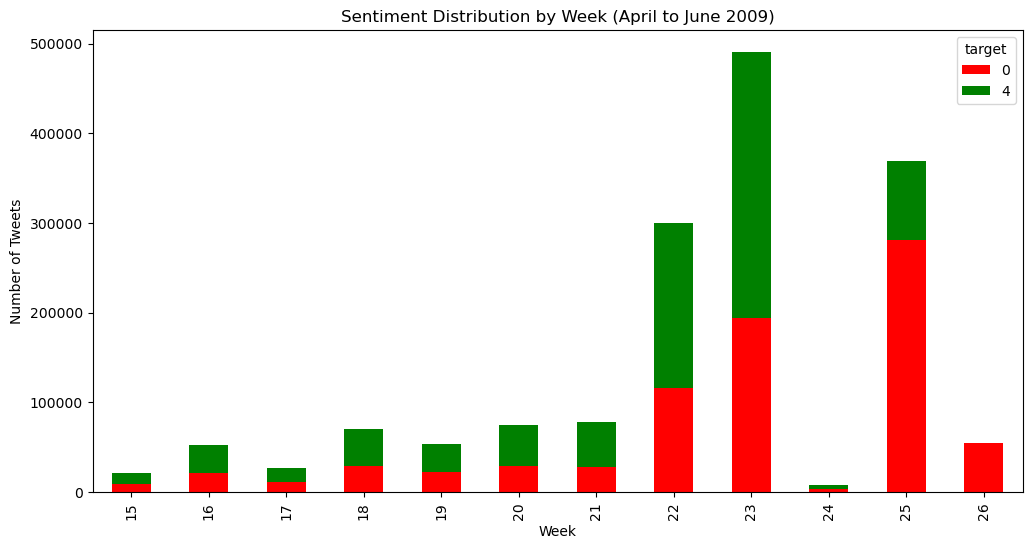

In [78]:
# Create a 'week' column based on the date
tweet['week'] = tweet['date'].dt.isocalendar().week

# Group by week and sentiment label to count the number of tweets
weekly_sentiment_distribution = tweet.groupby(['week', 'target']).size().unstack()

# Plot a stacked bar chart showing the sentiment distribution by week
weekly_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.title('Sentiment Distribution by Week (April to June 2009)')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.show()

## **5) Daily Sentiment Variations**:
   - Analysis by day of the week showed that sentiment did not vary significantly on a daily basis, suggesting consistent user engagement and sentiment expression throughout the week.

**Core findings :**
- **Daily Consistency** Sentiment remains consistent across all days of the week.


## **6) Tweet Length**:
    - The majority of tweets were concise, typically ranging from 45 to 50 characters. This indicates that Twitter users often prefer brevity in their communications.

**Core findings :**
- **Tweet Length** Common tweet length is between `45 to 50 characters.`


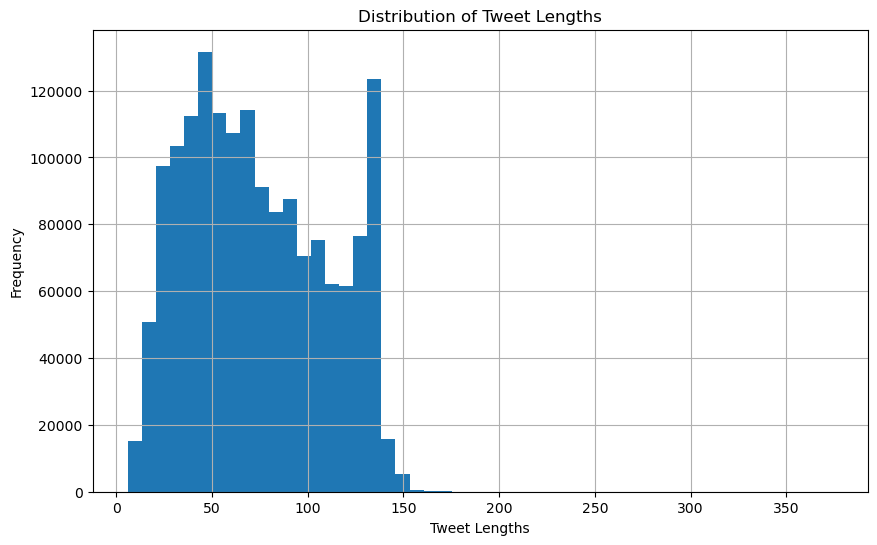

In [79]:
# Tweet Length Distribution

tweet['text_length'].hist(bins=50, figsize=(10,6))
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Lengths')
plt.ylabel('Frequency')
plt.show()

## **7) Word Frequency by Sentiment**:
    - Positive tweets frequently used words like "love," "great," and "happy," reflecting an optimistic tone. In contrast, negative tweets often contained words such as "hate," "bad," and "sad," highlighting a clear distinction in emotional expression.

**Core findings :**
- **Word Frequency**
   - **Positive Words**: "Love," "Great," "Happy."
   - **Negative Words**: "Hate," "Bad," "Sad."

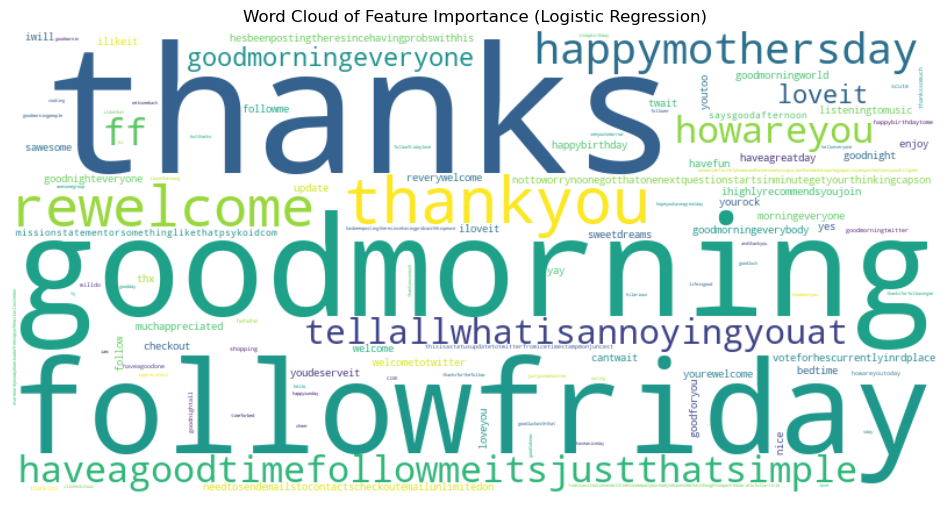

In [80]:
# Word Cloud

from wordcloud import WordCloud

# Create a dictionary of feature names and their importance
importance_dict = dict(zip(feature_names, coefficients))

# Create and display the word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(importance_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feature Importance (Logistic Regression)')
plt.show()

## **8) Consistent User Engagement**:
    - The analysis of tweet distribution across weeks and months showed steady user engagement, with no significant drop in the volume of tweets over time.

**Core findings :**
- **User Engagement**  Consistent user engagement across weeks and months.   

## **9) Event-Driven Sentiment Peaks**:
    - The sharp increase in negative sentiment in late June suggests that specific events or external factors influenced public opinion during this period.

**Core findings :**
- **Event-Driven Peaks** `Late June` saw a spike in `negative sentiment`, likely due to `specific events.`

## **10) Lack of Neutral Sentiment**:
    - The absence of neutral sentiment in the dataset indicates that users tend to express strong opinions on Twitter, rather than moderate or neutral views.

**Core findings :**
- **No Neutral Sentiment** The dataset `lacks neutral sentiment`, reflecting strong opinions.


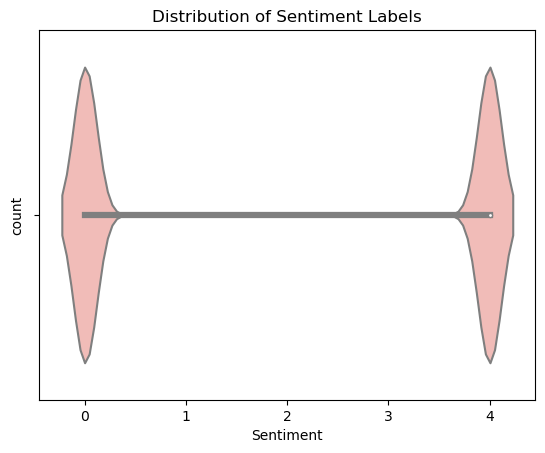

In [81]:
sns.violinplot(x='target', data=tweet,palette='Pastel1')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.show()

# ***11.Recommendations***

## **1) Investigate the June Sentiment Shift**:

- Conduct a deeper analysis of the specific events or discussions that led to the significant rise in negative sentiment during the last weeks of June. Understanding these factors can help in crafting responses to mitigate negative public opinion.


## **2) Capitalize on Positive Sentiment**:

-  Since positive sentiment was consistently present, especially in May, there is an opportunity to reinforce and amplify the content or messages that generated this positive response.


## **3) Real-Time Sentiment Monitoring**:

- Implement a real-time sentiment monitoring system to quickly identify and respond to sudden changes in public sentiment. This approach is particularly valuable in addressing negative sentiment spikes.

## **4) Develop Concise Messaging**:

- Given the preference for shorter tweets, ensure that communication strategies prioritize clarity and brevity. Craft messages that effectively convey key points within the typical tweet length range to maximize engagement.


## **5) Sentiment Analysis for Event Planning**:

- Use sentiment analysis as a tool for planning and evaluating events or campaigns. By understanding how public sentiment shifts in response to certain actions or messages, strategies can be adjusted to better align with public opinion.